<a href="https://colab.research.google.com/github/rushi-k12/PyCaret/blob/main/PyCaret_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s e

In [ ]:
from pycaret.clustering import *

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<AxesSubplot: xlabel='Age', ylabel='Density'>

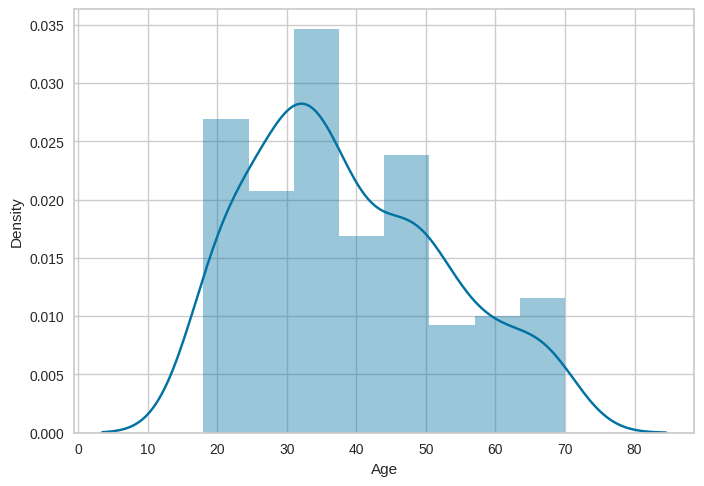

In [ ]:
sns.distplot(df['Age'])

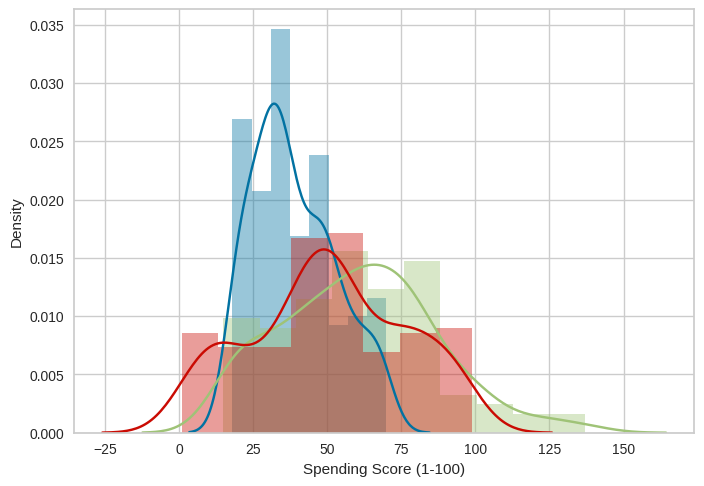

In [ ]:
for i in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  sns.distplot(df[i])


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

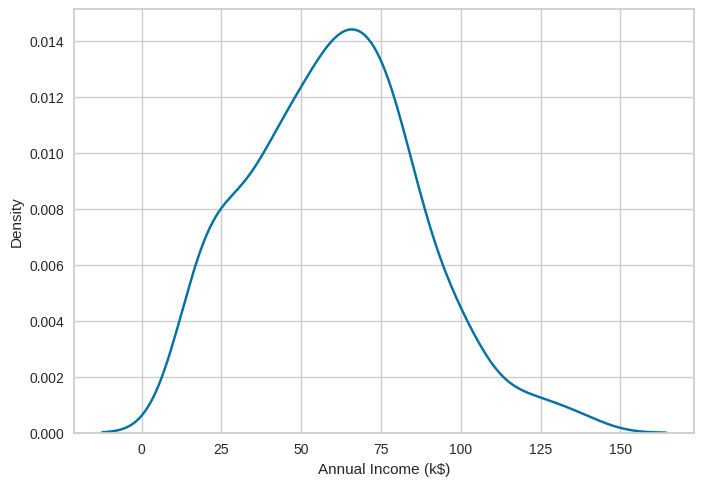

In [ ]:
sns.kdeplot(df['Annual Income (k$)'])

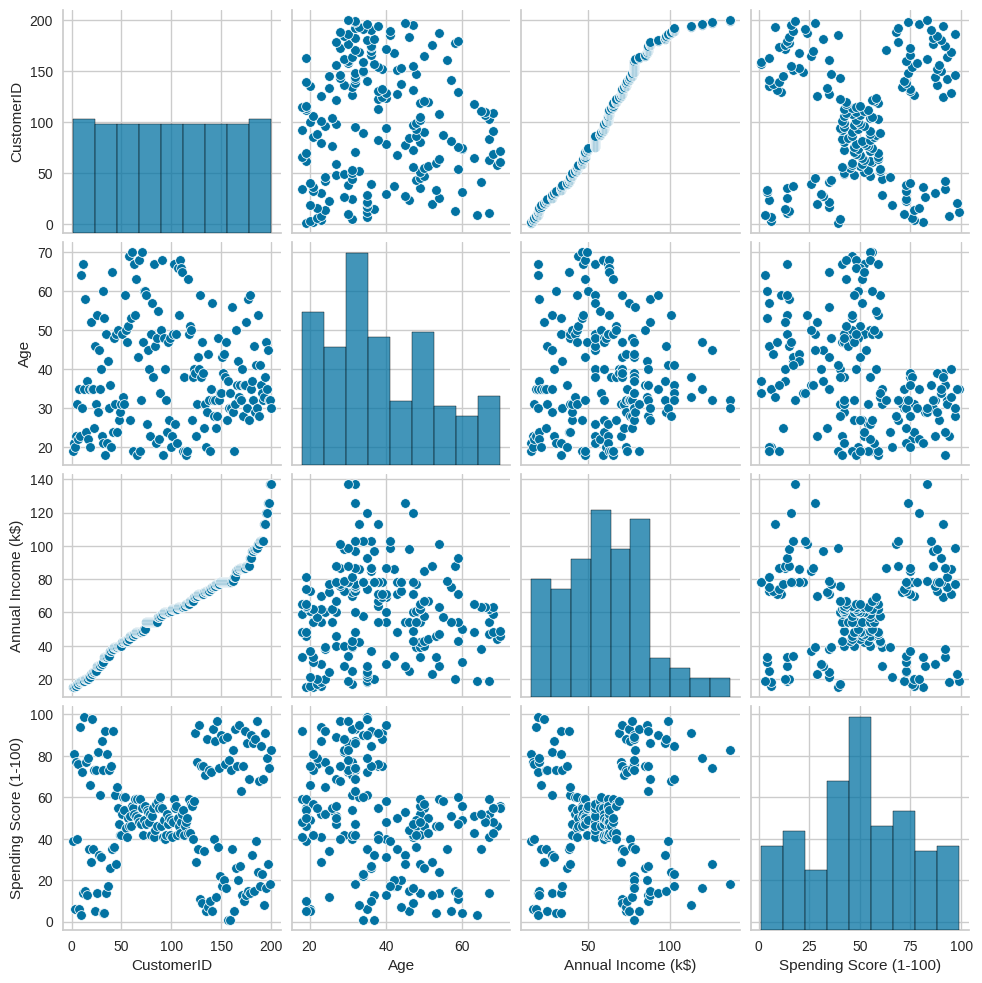

In [ ]:
sns.pairplot(df)

In [ ]:
setup(df,normalize=True,ignore_features='CustomerID',session_id=1)

,Description,Value
0,Session id,1
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,10
4,Ordinal features,1
5,Numeric features,3
6,Categorical features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3012,69.7826,1.2918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(n_clusters=4, random_state=1)


In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
kmeans_df = assign_model(kmeans)
kmeans_df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 3
1,Male,21,15,81,Cluster 3
2,Female,20,16,6,Cluster 2
3,Female,23,16,77,Cluster 1
4,Female,31,17,40,Cluster 2
...,...,...,...,...,...
195,Female,35,120,79,Cluster 1
196,Female,45,126,28,Cluster 2
197,Male,32,126,74,Cluster 3
198,Male,32,137,18,Cluster 0


In [ ]:
plot_model(kmeans)

In [ ]:
save_model(kmeans,'kmeans_pyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Genre'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Genre'],
                                     transformer=OrdinalEncoder(cols=['Genre'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Genre',
                                                                          'data_type': dtype('O'),
                                                            